# Caso de análisis: Diamonts dataset

## 1. Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #import plotting package
#import matplotlib as mpl #additional plotting functionality
#mpl.rcParams['figure.dpi'] = 100 #400 #high resolution figures

## 2. Importación de datos

Carga de datos con la librería seaborn

In [2]:
# diamonds = sns.load_dataset('diamonds', cache = True, data_home = None)
# diamonds.head()

Carga de datos en formato csv

In [3]:
path = r'C:\Users\DELL\OneDrive\Formación\Python\Cursos\Python - FROGAMES'
file = 'diamonds.csv'
main_path = path + '/' + file
diamonds = pd.read_csv(main_path)

Verificación preliminar del dataset

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 3. Formalización del propósito de estudio

Con la información porporcionada en el dataset cargado se pretende hacer un análisis exploratorio y hallar alguna variable candidata a explicar el precio de los diamantes.

## 4. Data Wrangle

La primera columna del dataset representa el conteo de los registros existentes, muestra la misma información que el índice en el data frame. Por ello, dicha columna será eliminada.

In [6]:
diamonds_c = diamonds.iloc[:,1:]
diamonds_c.columns.values.tolist()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

## 5. Análisis

### Descripción general del dataset

In [7]:
# Todas las variables
# diamonds_c.describe(include = 'all')

In [8]:
diamonds_c.describe(include = 'object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [9]:
diamonds_c.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Distribución de los datos

**Variable: cut**

Existen 5 valores únicos en el datase set

In [10]:
diamonds_c['cut'].nunique()

5

In [11]:
diamonds_c['cut'].value_counts(ascending = True)

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

In [12]:
diamonds_c1 = diamonds_c['cut'].value_counts().reset_index(name = 'count')
diamonds_c1

,index,count
0,Ideal,21551
1,Premium,13791
2,Very Good,12082
3,Good,4906
4,Fair,1610


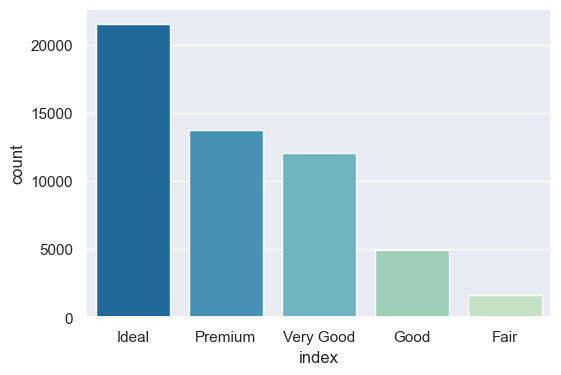

In [13]:
diamonds_c1 = diamonds_c['cut'].value_counts(ascending = False).reset_index(name = 'count')

plt.figure(figsize = (6,4))
# darkgrid, whitegrid, dark, white, and ticks
sns.set_theme(style = 'darkgrid', palette = 'GnBu_r')
#sns.reset_defaults()

sns.barplot(x = 'index', y = 'count', data = diamonds_c1)#, color = 'darkcyan')
plt.show()

In [23]:
diamonds_c.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


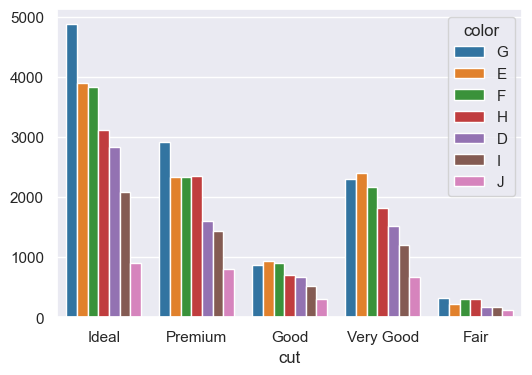

In [38]:
plt.figure(figsize = (6,4))
# darkgrid, whitegrid, dark, white, and ticks
sns.set_theme(style = 'darkgrid', palette = 'tab10')
#sns.reset_defaults()

sns.barplot(x = 'cut', y = diamonds_c.index, hue = 'color',hue_order = ['G','E','F','H','D','I','J'],
            data = diamonds_c,estimator = len)#, color = 'darkcyan')
plt.show()

In [15]:
diamonds_c.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Many numpy functions can be used directly, for example **np.median**. Mean is supported as **np.mean**. **len**, **sum**, **max** and **min** are built-in python functions and work without being imported from a library.

You can also provide your own function. For example estimator=lambda x: sum(xi*xi for xi in x). Or lambda x: np.percentile(x, 95).

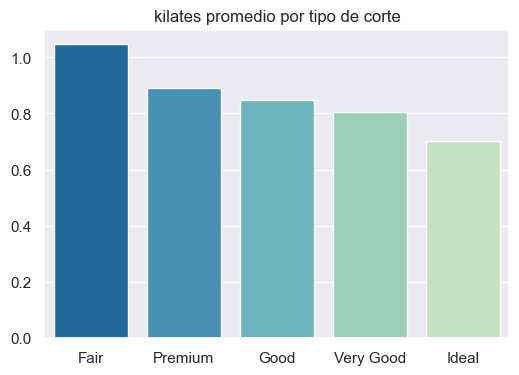

In [16]:
# ci representa el error
data_plot = (diamonds_c.groupby('cut')['carat'].
             mean().
             reset_index().
             sort_values(by = 'carat', ascending = False))

plt.figure(figsize = (6,4))
sns.set_theme(style = 'darkgrid', palette = 'GnBu_r')

sns.barplot(x = 'cut', y = 'carat', data = data_plot,
            estimator = np.mean, ci = None)

# Add title and axis names
plt.title('kilates promedio por tipo de corte')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [17]:
data_plot = diamonds_c.groupby('cut')['carat'].\
            mean().\
            reset_index().\
            sort_values(by = 'carat', ascending = False)
data_plot

,cut,carat
0,Fair,1.046137
3,Premium,0.891955
1,Good,0.849185
4,Very Good,0.806381
2,Ideal,0.702837


In [18]:
data_plot = (diamonds_c.groupby('cut')['carat'].
             mean().
             reset_index().
             sort_values(by = 'carat', ascending = False))
data_plot

,cut,carat
0,Fair,1.046137
3,Premium,0.891955
1,Good,0.849185
4,Very Good,0.806381
2,Ideal,0.702837


**Variable: carat**

In [47]:
diamonds_c.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


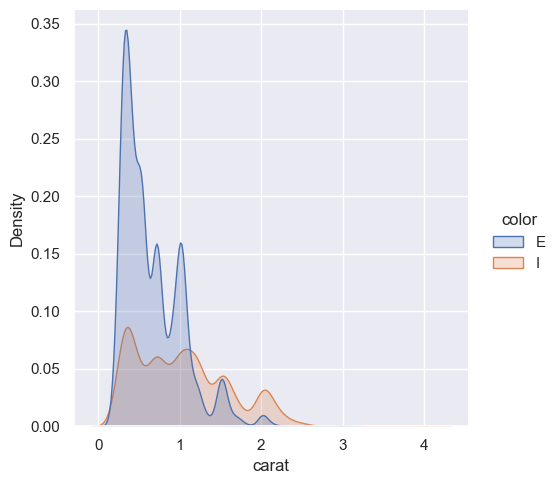

In [59]:
# darkgrid, whitegrid, dark, white, and ticks
sns.set_theme(style = 'darkgrid')
sns.displot(data = diamonds_c, x = "carat", kind = 'kde', fill = True, hue = 'color', hue_order = ['E','I'])
plt.show()

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex")

In [60]:
diamonds_c.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

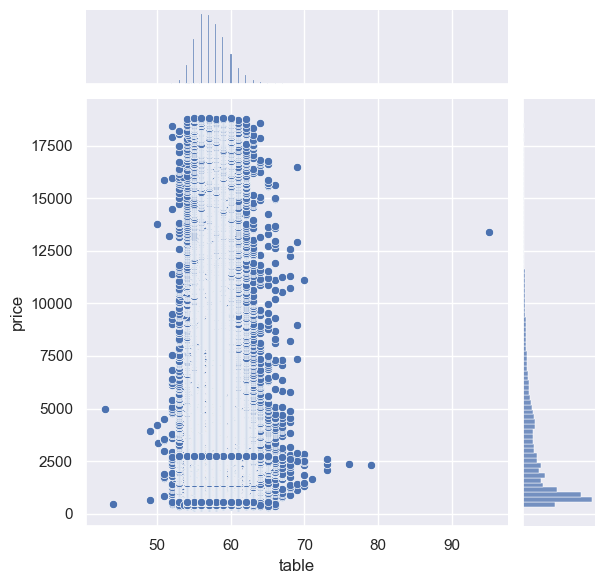

In [63]:
sns.jointplot(data = diamonds_c, x = "table", y="price")